In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the final cleaned dataset
df = pd.read_csv('census_epa_theil_cleaned.csv')

In [3]:
df.head(3)

,ID,NAME,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,AREALAND,pop_tot,pop_white_only,pop_black,...,UST,PWDIS,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,prim_ind_share,sec_ind_share,health_ins_pct,theil_income_median
0,1001020100,"Census Tract 201, Autauga County, Alabama",Alabama,AL,Autauga,4.0,9825304.0,1791.0,1502.0,199.0,...,0.330720,0.086036,83.863763,11.111111,2.400893,1.563372,0.111669,4.969291,90.954774,0.000003
1,1001020200,"Census Tract 202, Autauga County, Alabama",Alabama,AL,Autauga,4.0,3320818.0,2010.0,785.0,1175.0,...,2.208384,0.097622,39.054726,58.457711,2.736318,0.497512,0.000000,6.746712,93.024585,0.000004
2,1001020300,"Census Tract 203, Autauga County, Alabama",Alabama,AL,Autauga,4.0,5349271.0,3577.0,2433.0,1105.0,...,1.830997,0.001432,68.017892,30.891809,3.634330,0.363433,0.000000,7.450098,96.232780,0.000002


In [4]:
df.columns

Index(['ID', 'NAME', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME', 'REGION',
       'AREALAND', 'pop_tot', 'pop_white_only', 'pop_black', 'pop_asian',
       'pop_hispanic_latino_any', 'industry_tot', 'industry_ag_for',
       'industry_const', 'industry_manu', 'industry_transp', 'pop_density',
       'poverty_pct', 'income_median', 'health_ins_tot', 'health_ins_yes',
       'health_ins_no', 'PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT',
       'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS', 'pct_pop_white_only',
       'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any',
       'prim_ind_share', 'sec_ind_share', 'health_ins_pct',
       'theil_income_median'],
      dtype='object')

In [5]:
df.isnull().sum()

ID                             0
NAME                           0
STATE_NAME                     0
ST_ABBREV                      0
CNTY_NAME                      0
REGION                         0
AREALAND                       0
pop_tot                        0
pop_white_only                 0
pop_black                      0
pop_asian                      0
pop_hispanic_latino_any        0
industry_tot                   0
industry_ag_for                0
industry_const                 0
industry_manu                  0
industry_transp                0
pop_density                    0
poverty_pct                    0
income_median                  0
health_ins_tot                 0
health_ins_yes                 0
health_ins_no                  0
PM25                           0
OZONE                          0
DSLPM                          0
PTRAF                          0
PRE1960PCT                     0
PNPL                           0
PRMP                           0
PTSDF     

In [6]:
# Selecting the relevant columns that will be used for the model
# PM25 is the target variable
# The other variables are the features

rel_cols = ['PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS', 'pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any', 'pop_density', 'prim_ind_share', 'sec_ind_share', 'poverty_pct', 'theil_income_median', 'health_ins_pct']

In [7]:
model_df = df[rel_cols]

In [8]:
model_df.head(3)

,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct
0,9.693224,59.94949,0.161449,12.358415,0.289474,0.066498,0.077498,0.062147,0.330720,0.086036,83.863763,11.111111,2.400893,1.563372,182.284436,0.111669,4.969291,15.4,0.000003,90.954774
1,9.722213,60.02012,0.176942,65.510247,0.294511,0.072671,0.082691,0.067863,2.208384,0.097622,39.054726,58.457711,2.736318,0.497512,605.272556,0.000000,6.746712,6.6,0.000004,93.024585
2,9.743874,59.90393,0.204497,46.665740,0.087077,0.075500,0.082142,0.071178,1.830997,0.001432,68.017892,30.891809,3.634330,0.363433,668.689248,0.000000,7.450098,17.2,0.000002,96.232780


In [9]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80151 entries, 0 to 80150
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PM25                         80151 non-null  float64
 1   OZONE                        80151 non-null  float64
 2   DSLPM                        80151 non-null  float64
 3   PTRAF                        80151 non-null  float64
 4   PRE1960PCT                   80151 non-null  float64
 5   PNPL                         80151 non-null  float64
 6   PRMP                         80151 non-null  float64
 7   PTSDF                        80151 non-null  float64
 8   UST                          80151 non-null  float64
 9   PWDIS                        80151 non-null  float64
 10  pct_pop_white_only           80151 non-null  float64
 11  pct_pop_black                80151 non-null  float64
 12  pct_pop_asian                80151 non-null  float64
 13  pct_pop_hispanic

<Figure size 1500x600 with 0 Axes>

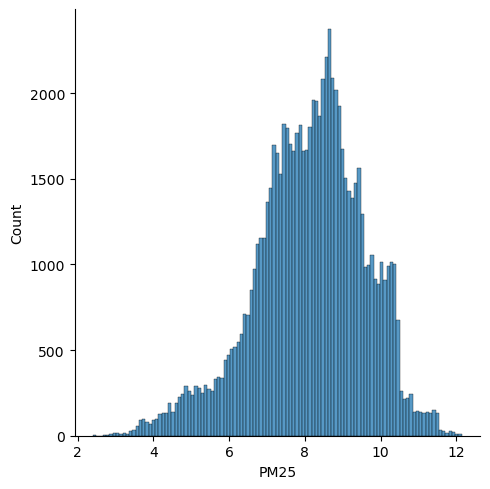

In [11]:
# Distribution of PM25 in the dataset

plt.figure(figsize=(15,6))
sns.displot(model_df['PM25'])

In [12]:
# Converting the target variable to a categorical variable
# PM25 values greater than 9 are considered unhealthy

model_df['PM25_risk'] = model_df['PM25'].apply(lambda x: 1 if x>9 else 0)

/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_12042/75472975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['PM25_risk'] = model_df['PM25'].apply(lambda x: 1 if x>9 else 0)


In [16]:
len(model_df[model_df['PM25'] > 9])

21991

In [17]:
model_df['PM25_risk'].value_counts()

0    58160
1    21991
Name: PM25_risk, dtype: int64

## EDA

In [86]:
# Correlation Matrix
model_df.describe()

,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS,...,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct,PM25_risk
count,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,8.015100e+04,...,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000,80151.000000
mean,8.123539,61.752785,0.265676,213.008206,0.293201,0.134009,0.429953,1.970240,3.930096,2.058177e+01,...,15.269458,6.177730,16.942001,2111.849897,0.847001,8.187038,13.559655,0.000001,91.137442,0.274370
std,1.451993,5.975146,0.197133,446.917302,0.261812,0.271412,0.684055,3.801710,7.152819,1.439378e+03,...,21.768297,10.070292,21.526574,4765.358930,1.837227,4.219264,11.073748,0.000006,7.412971,0.446199
min,2.408918,43.279170,0.003098,0.000065,0.000000,0.002002,0.005282,0.004462,0.000000,1.000000e-15,...,0.000000,0.000000,0.000000,0.021003,0.000000,0.000000,0.000000,-0.000015,22.583316,0.000000
25%,7.240152,58.226960,0.132586,27.118144,0.060322,0.026913,0.090924,0.136619,0.249482,6.834454e-05,...,1.748825,0.515182,2.843526,137.025239,0.000000,5.196444,5.500000,-0.000003,88.023585,0.000000
50%,8.236790,61.209600,0.221054,86.833604,0.219780,0.060707,0.173159,0.537136,1.453782,1.635863e-03,...,5.997110,2.467751,8.039906,874.163112,0.153270,7.700698,10.500000,0.000001,93.154762,0.000000
75%,9.110071,65.069085,0.338374,208.329848,0.480267,0.130771,0.471976,2.140566,4.281486,3.350930e-02,...,18.531858,7.258538,21.474850,2089.455104,0.875853,10.660474,18.400000,0.000005,96.389729,1.000000
max,12.137195,100.257230,1.996183,12256.652984,1.000000,11.891744,13.682186,73.535511,126.661351,2.589740e+05,...,100.000000,100.000000,100.000000,119744.771358,36.585366,218.292683,95.300000,0.000042,100.000000,1.000000


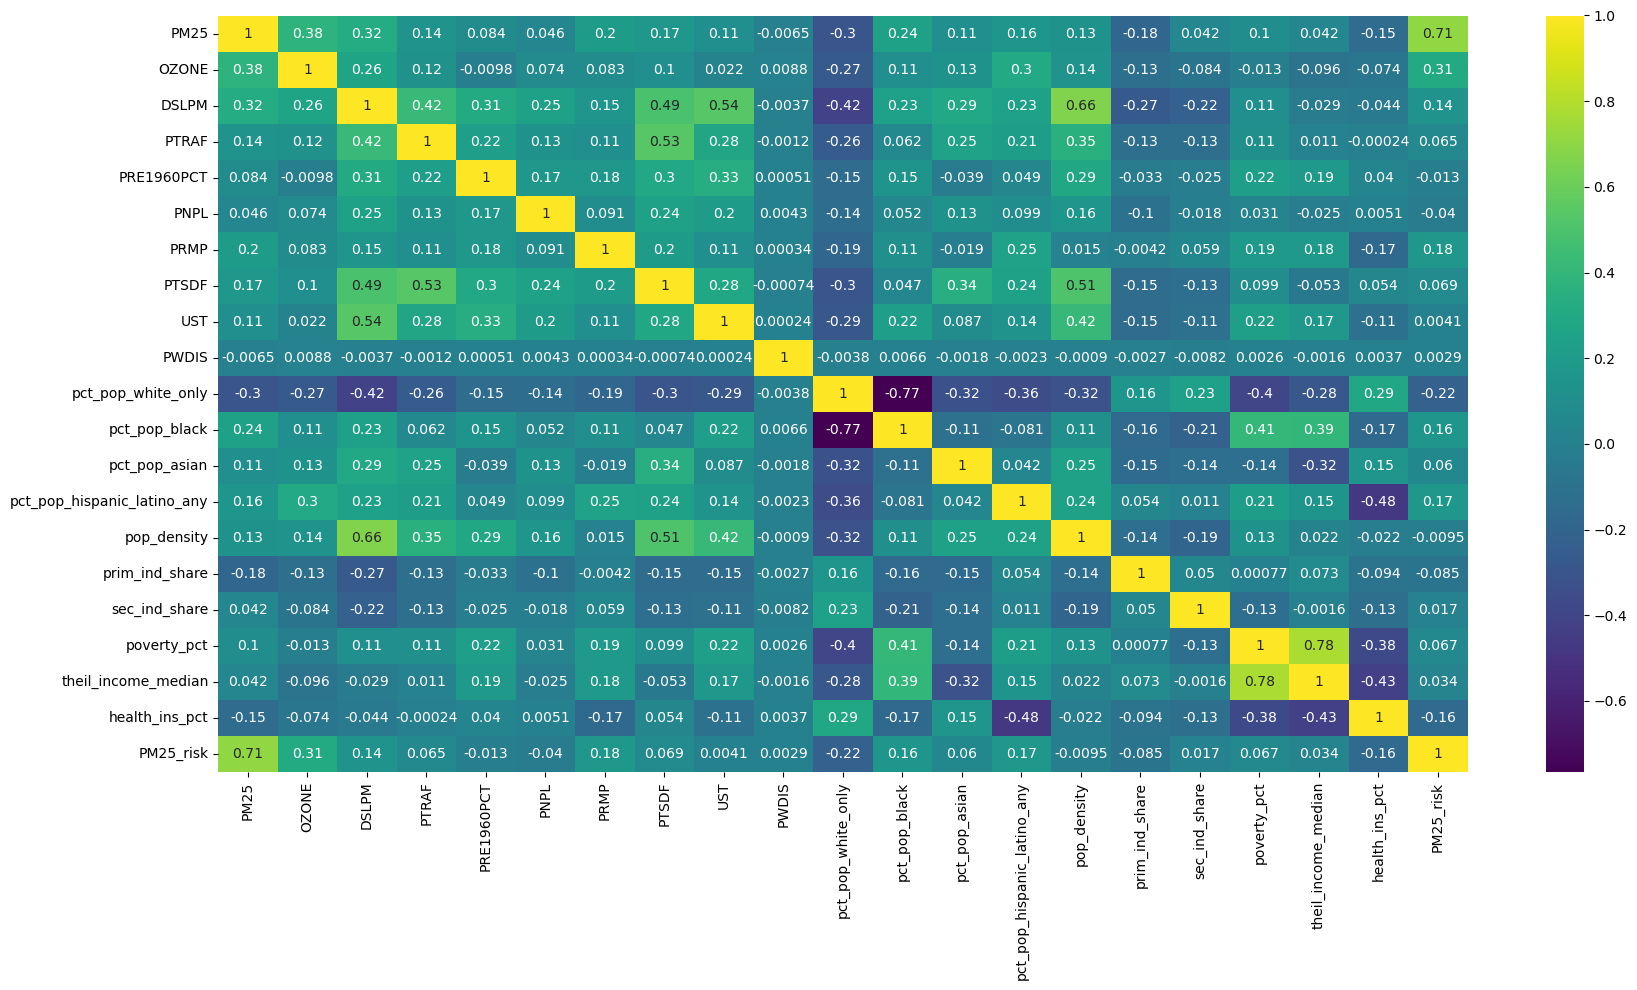

In [18]:
plt.figure(figsize=(18, 10))
sns.heatmap(model_df.corr(), annot=True, cmap='viridis')
plt.tight_layout()

<Axes: xlabel='pct_pop_white_only', ylabel='pct_pop_black'>

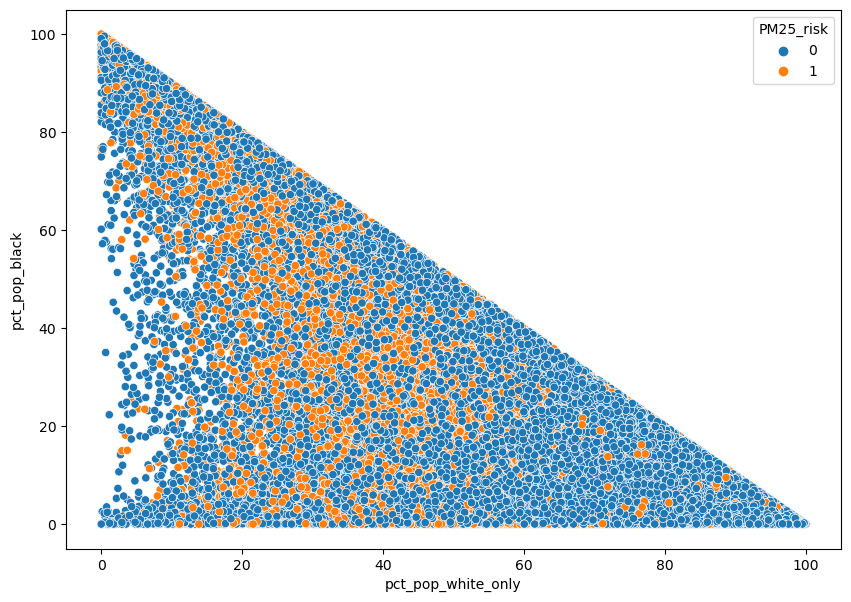

In [33]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pct_pop_white_only', y='pct_pop_black', hue='PM25_risk', data=model_df)

<Axes: xlabel='OZONE', ylabel='Count'>

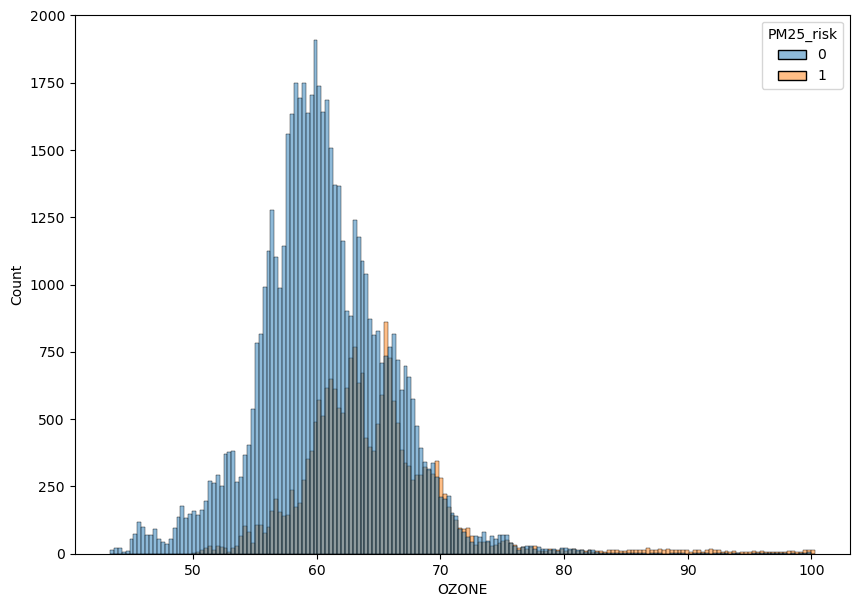

In [40]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='OZONE', hue='PM25_risk')

<Axes: xlabel='pct_pop_white_only', ylabel='Count'>

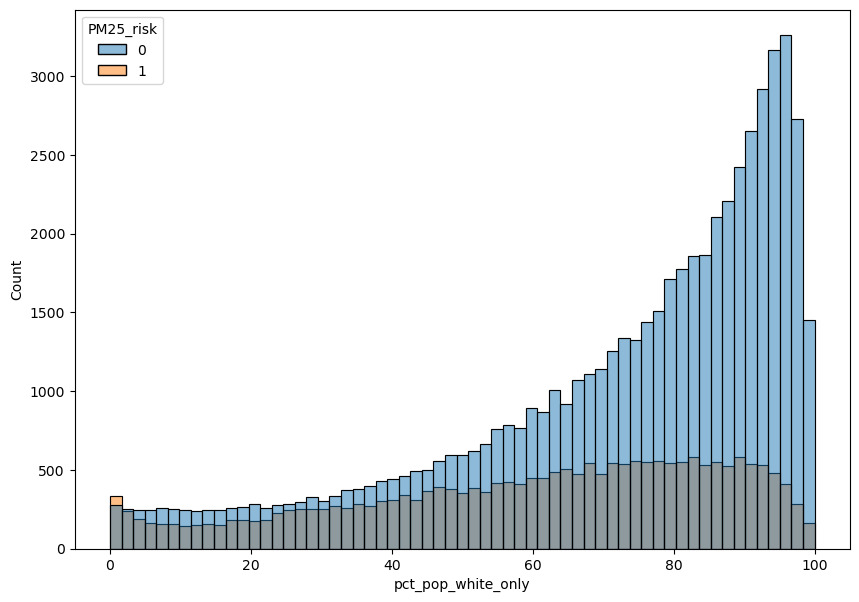

In [43]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='pct_pop_white_only', hue='PM25_risk')

<Axes: xlabel='pct_pop_black', ylabel='Count'>

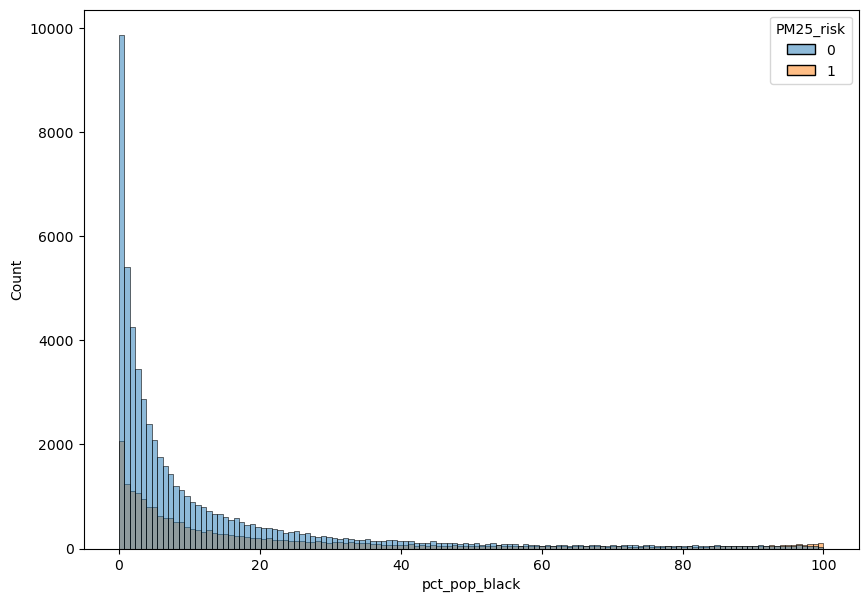

In [45]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='pct_pop_black', hue='PM25_risk')

<Axes: xlabel='health_ins_pct', ylabel='Count'>

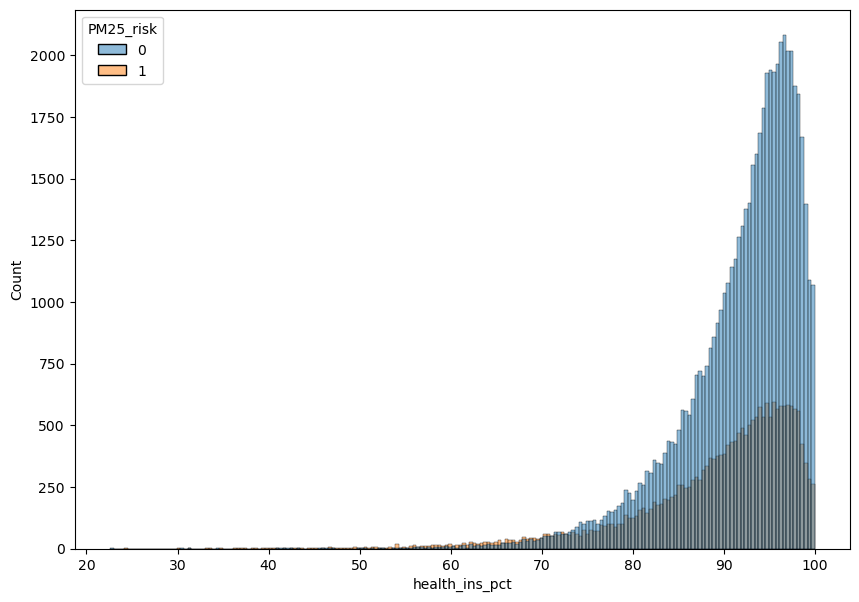

In [47]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='health_ins_pct', hue='PM25_risk')

In [48]:
# OZONE and PM25 are highly correlated
# white and non-white population have mild correlation with PM25

## Model (Decision Tree)

In [129]:
from sklearn.model_selection import train_test_split

In [140]:
# Splitting the dataset into train and test sets

X = model_df.drop(['PM25', 'PM25_risk'], axis=1)
y = model_df['PM25_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [141]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

0    58160
1    21991
Name: PM25_risk, dtype: int64
0    43520
1    16593
Name: PM25_risk, dtype: int64
0    14640
1     5398
Name: PM25_risk, dtype: int64


In [142]:
print(21991/len(y))
print(16506/len(y_train))
print(5485/len(y_test))

0.27436962732841763
0.27458286893018147
0.2737299131649865


In [143]:
# Scaling the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [144]:
X_train.columns

Index(['OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST',
       'PWDIS', 'pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian',
       'pct_pop_hispanic_latino_any', 'pop_density', 'prim_ind_share',
       'sec_ind_share', 'poverty_pct', 'theil_income_median',
       'health_ins_pct'],
      dtype='object')

In [145]:
# everything will be min_max scaled other than theil_income_median 
# theil_income_median will be standard scaled

In [146]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [147]:
std_scaler.fit(X_train[['theil_income_median']])
min_max_scaler.fit(X_train.drop('theil_income_median', axis=1))

MinMaxScaler()

In [148]:
X_train = np.hstack(( min_max_scaler.transform(X_train.drop('theil_income_median', axis=1)), std_scaler.transform(X_train[['theil_income_median']]) ))
X_test = np.hstack(( min_max_scaler.transform(X_test.drop('theil_income_median', axis=1)), std_scaler.transform(X_test[['theil_income_median']]) ))

In [152]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [153]:
dec_tree = DecisionTreeClassifier()

In [156]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [158]:
y_pred = dec_tree.predict(X_test)

In [180]:
# Evaluation Metrics

from sklearn.metrics import classification_report, confusion_matrix

In [181]:
print('Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
print('\n Classification Report: \n\n', classification_report(y_test, y_pred))

Confusion Matrix: 

 [[12826  1814]
 [ 1616  3782]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.88      0.88     14640
           1       0.68      0.70      0.69      5398

    accuracy                           0.83     20038
   macro avg       0.78      0.79      0.79     20038
weighted avg       0.83      0.83      0.83     20038



In [182]:
# Visualizing the Decision Tree

from sklearn.tree import plot_tree

In [192]:
print('\n Tree Depth = ', dec_tree.get_depth(), '\n No. of leaves = ', dec_tree.get_n_leaves())


 Tree Depth =  29 
 No. of leaves =  5236


In [193]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

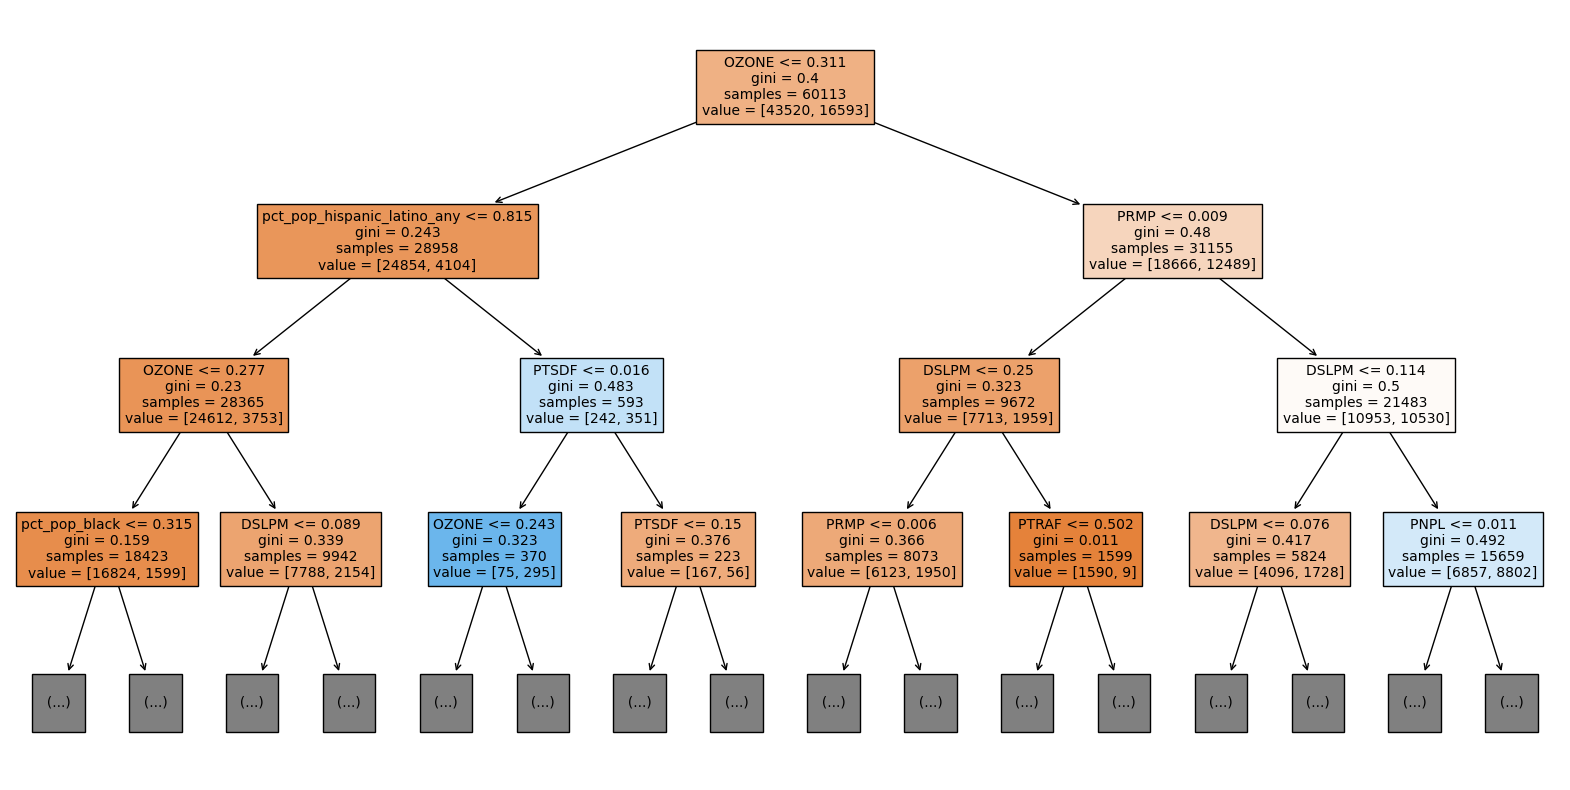

In [215]:
plt.figure(figsize=(20,10))
plot_tree(dec_tree, fontsize=10, max_depth=3, filled=True, feature_names=[col for col in X.columns])
plt.show()